# Calculate pre-tagged control plots for ttbar All-Hadronic Analysis

These are pre-tagged control plots of the QCD sample.
 - QCD MC is `/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/NANOAODSIM` from the 94x re-reco. 
 - JetHT dataset, Trigger is OR of
 ```
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet420_TrimMass30',
    'HLT_AK8PFJet500',
    'HLT_AK8PFJet550',
    'HLT_PFHT1050',
    'HLT_AK8PFHT850_TrimMass50',
    'HLT_AK8PFHT900_TrimMass50',
```
 - $\ge 2$ jets with $p_T > 400$ GeV and $|\eta| < 2.5$
 - Loose jet ID
 - $H_T > 1100$ GeV from AK4 jets (to be on trigger threshold)
 - Substructure plots ($\tau_{32}$ and $N_3$) have $100 < m_{softdrop} < 250$ GeV
 - JECs:
  - L1,L2,L3
  - Defaults from MINIAOD. I THINK they are:
   - 2016: `Summer16_23Sep2016V4`
   - 2017: `Fall17_17Nov2017_V6`
   - 2018: `101X_dataRun2_Prompt_v9`

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ttbarres/h_ak8pt_0bcen__nom
Info in <TCanvas::Print>: png file h_ak8pt_0bcen__nom.png has been created
Info in <TCanvas::Print>: pdf file h_ak8pt_0bcen__nom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ttbarres/h_ak8pt_0bfwd__nom
Info in <TCanvas::Print>: png file h_ak8pt_0bfwd__nom.png has been created
Info in <TCanvas::Print>: pdf file h_ak8pt_0bfwd__nom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ttbarres/h_ak8pt_1bcen__nom
Info in <TCanvas::Print>: png file h_ak8pt_1bcen__nom.png has been created
Info in <TCanvas::Print>: pdf file h_ak8pt_1bcen__nom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ttbarres/h_ak8pt_1bfwd__nom
Info in <TCanvas::Print>: png file h_ak8pt_1bfwd__nom.png has been created
Info in <TCanvas::Print>: pdf file h_ak8pt_1bfwd__nom.pdf has been created
Warning in <

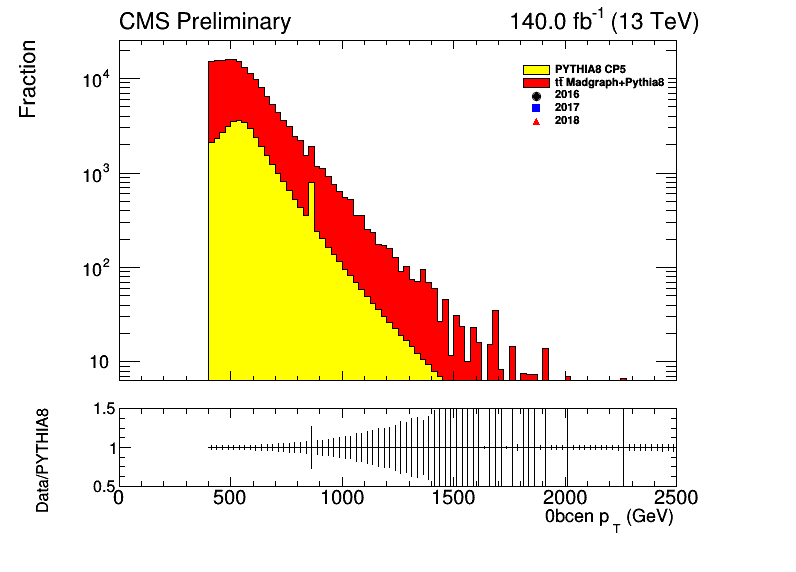

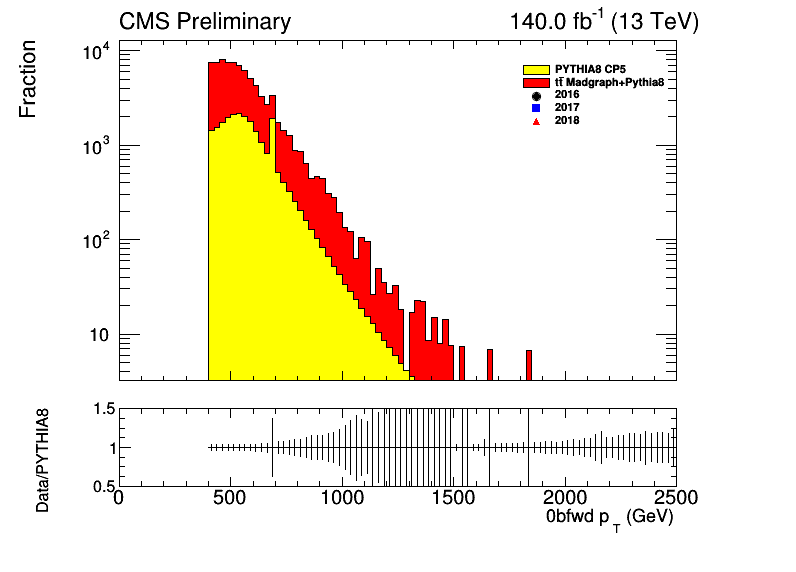

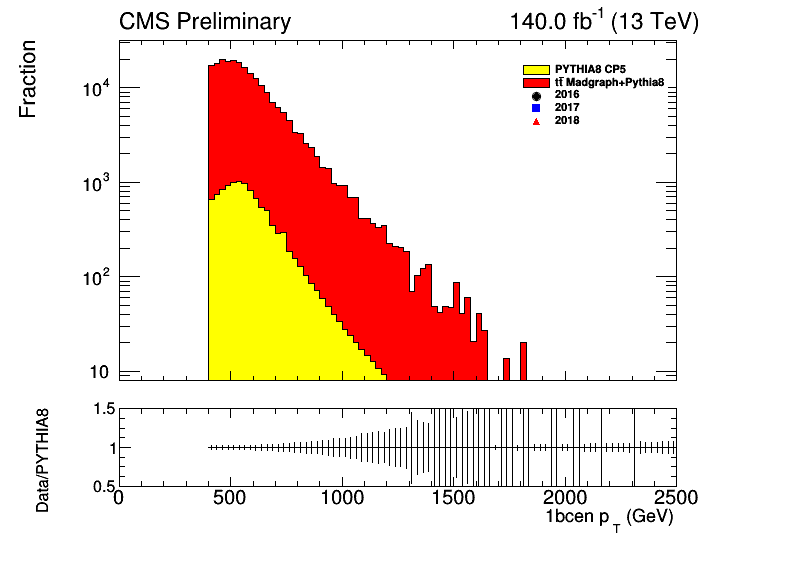

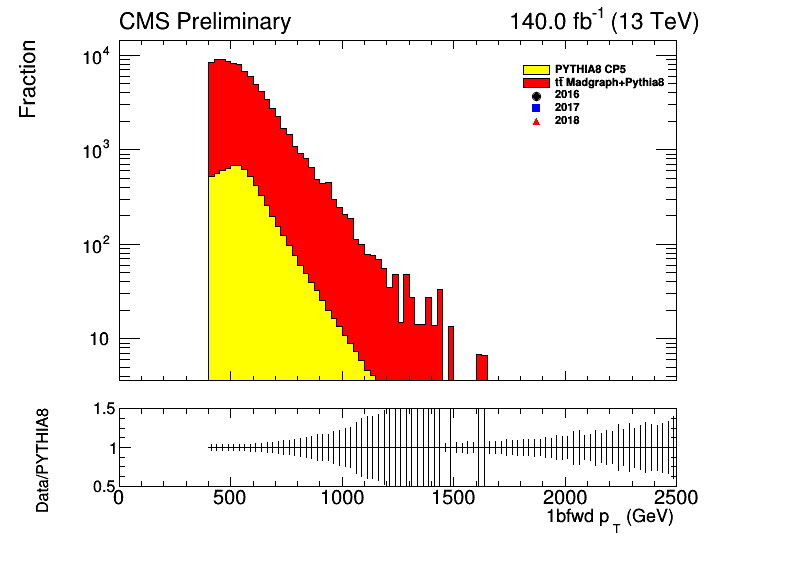

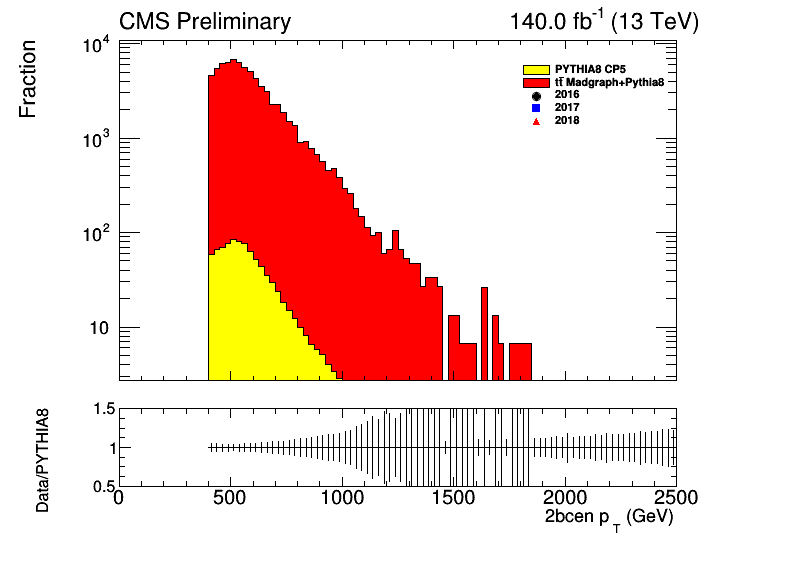

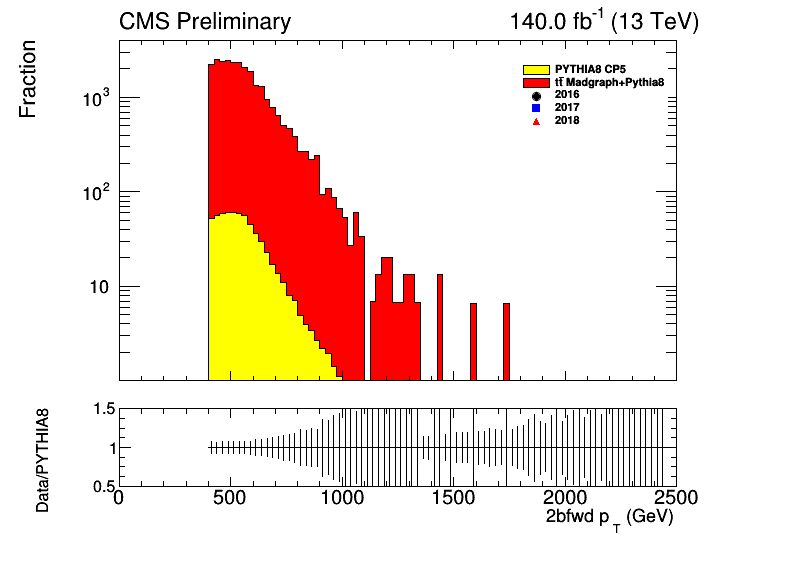

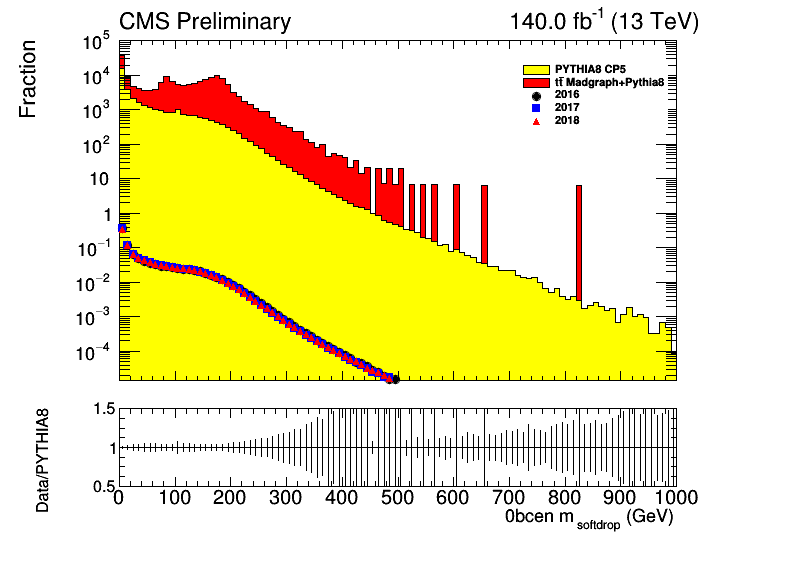

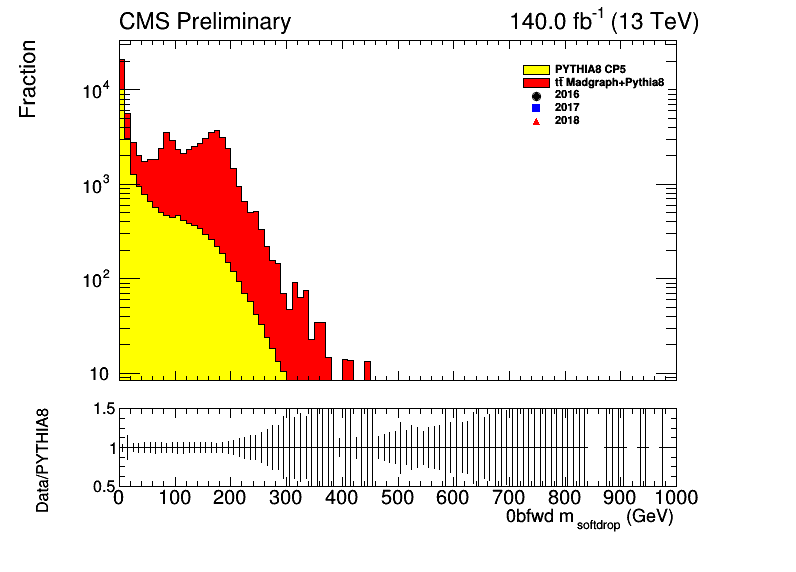

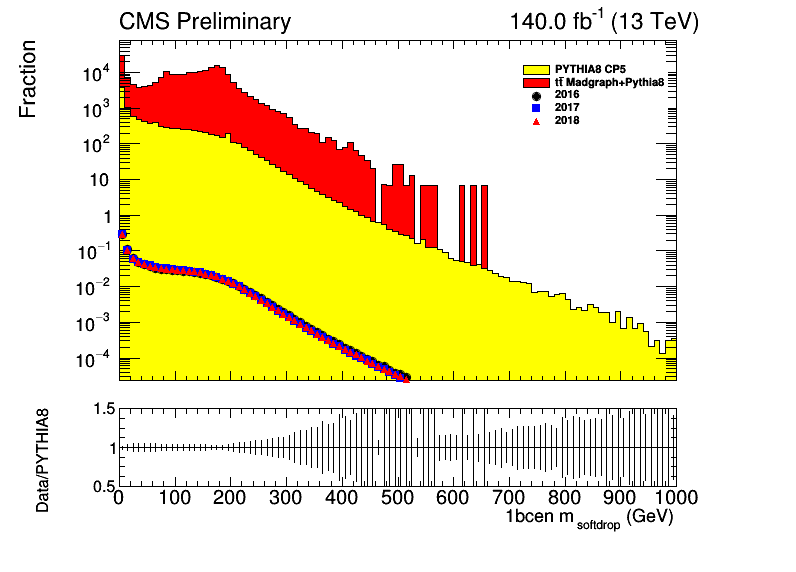

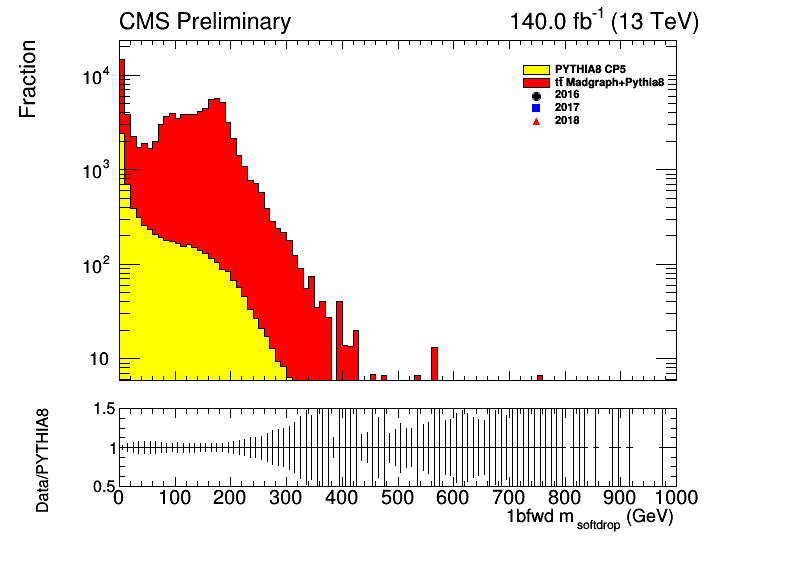

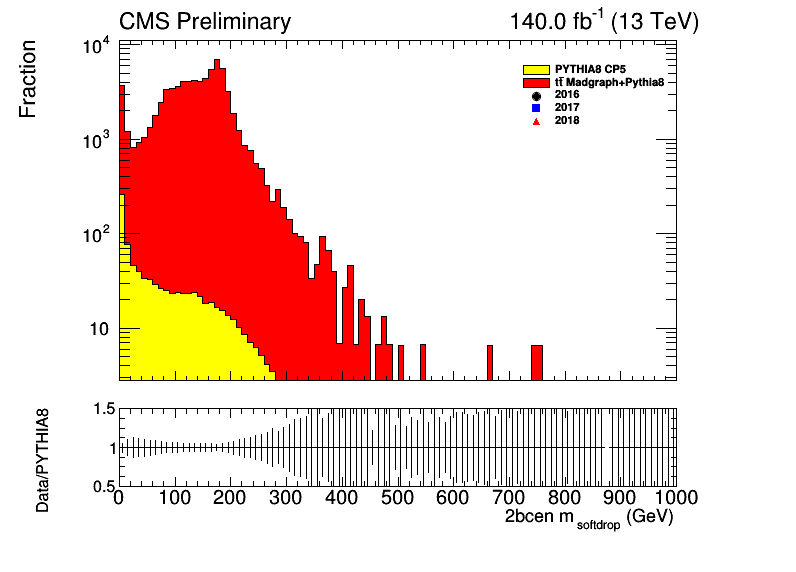

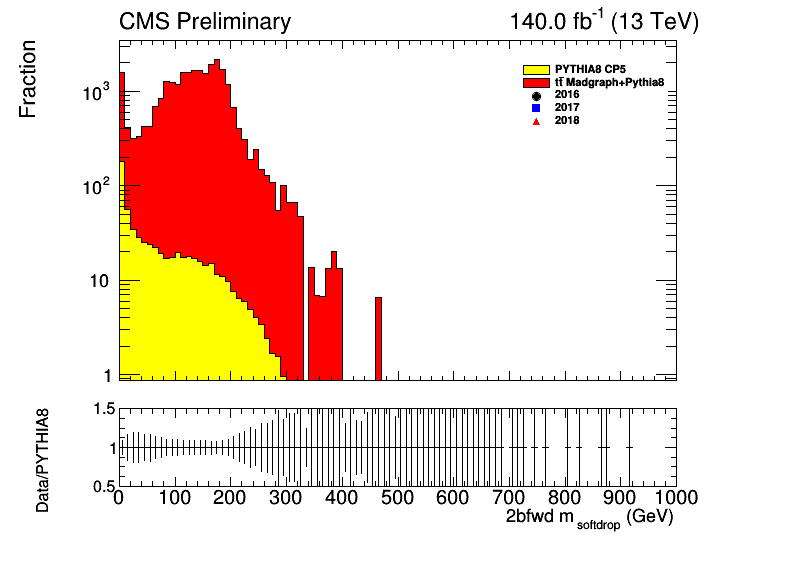

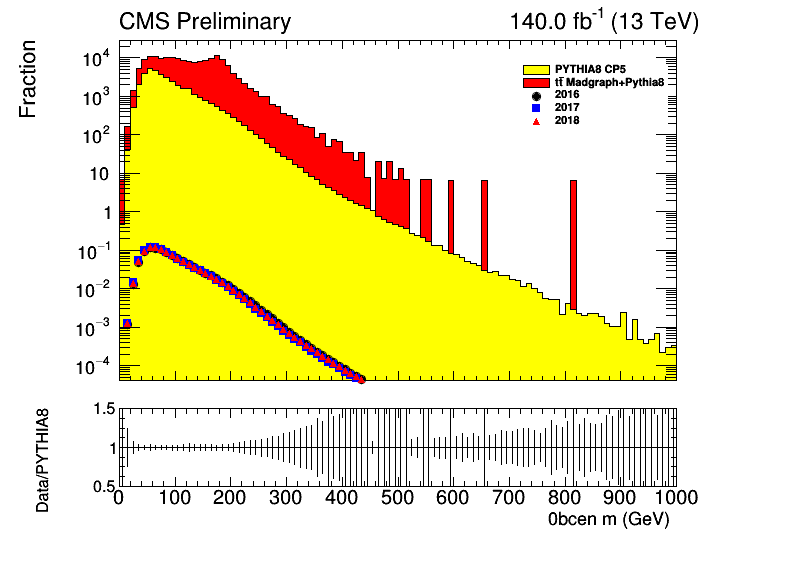

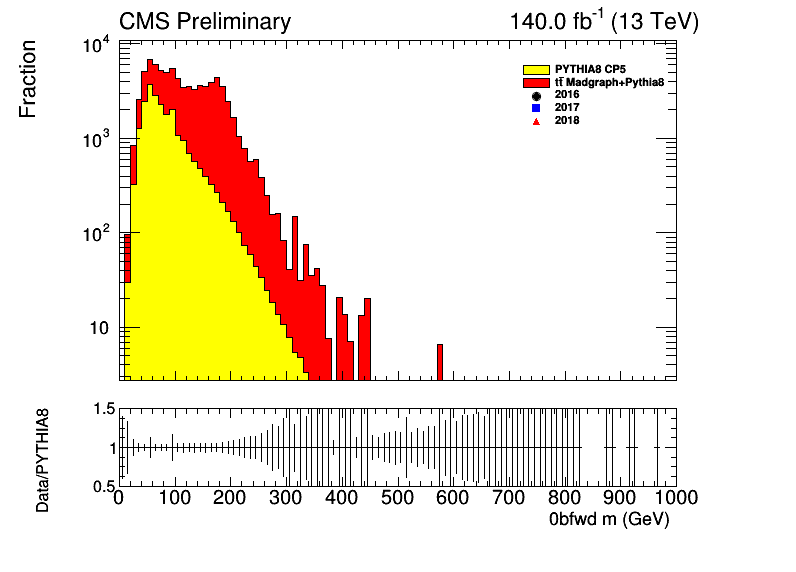

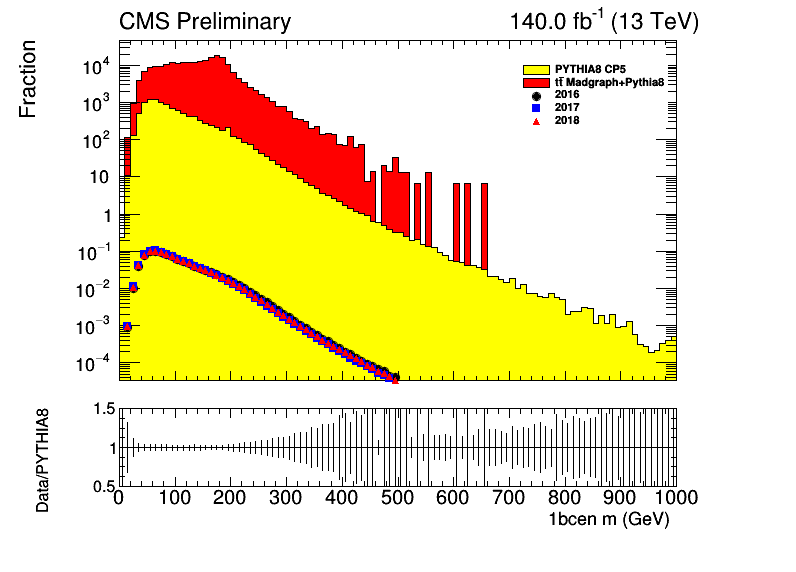

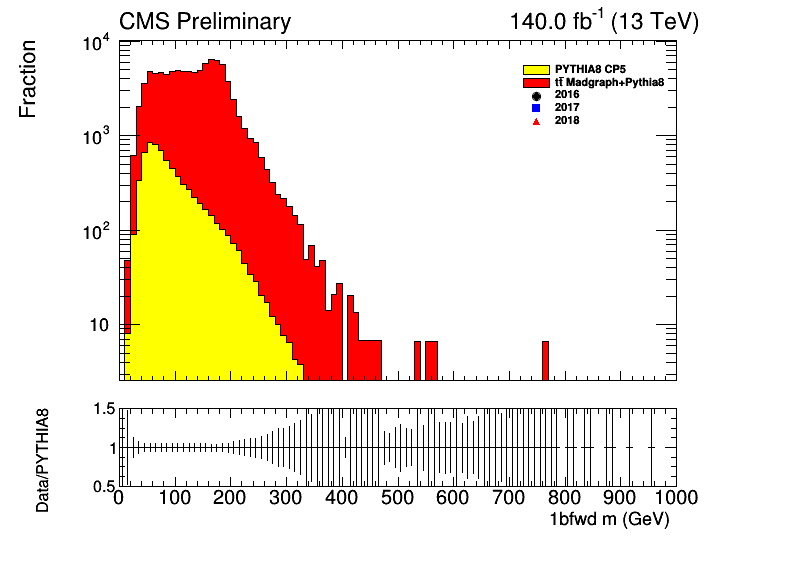

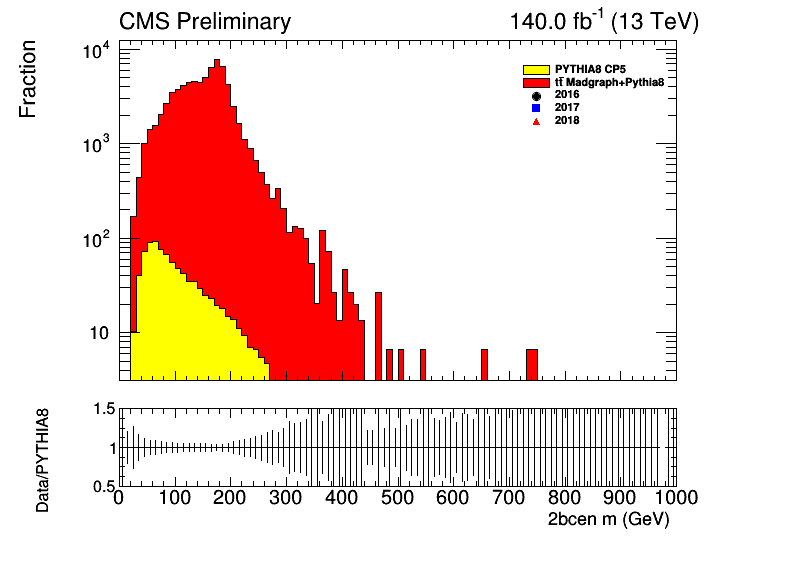

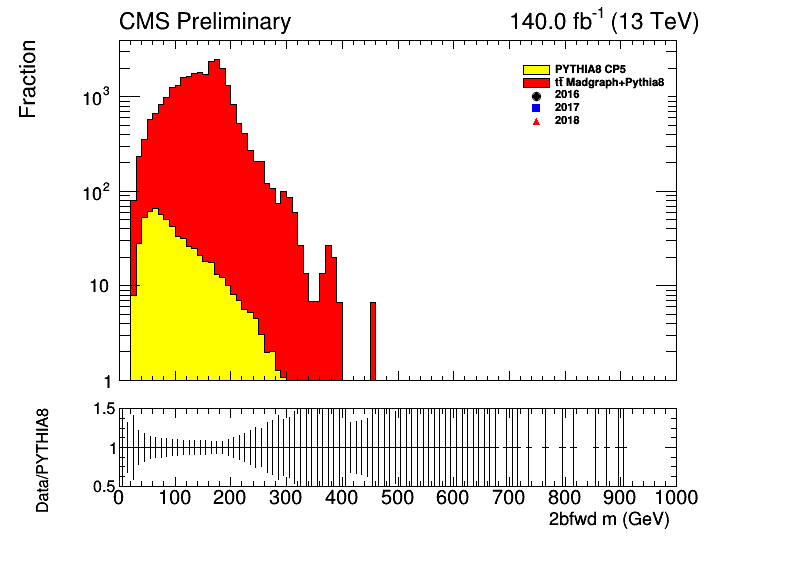

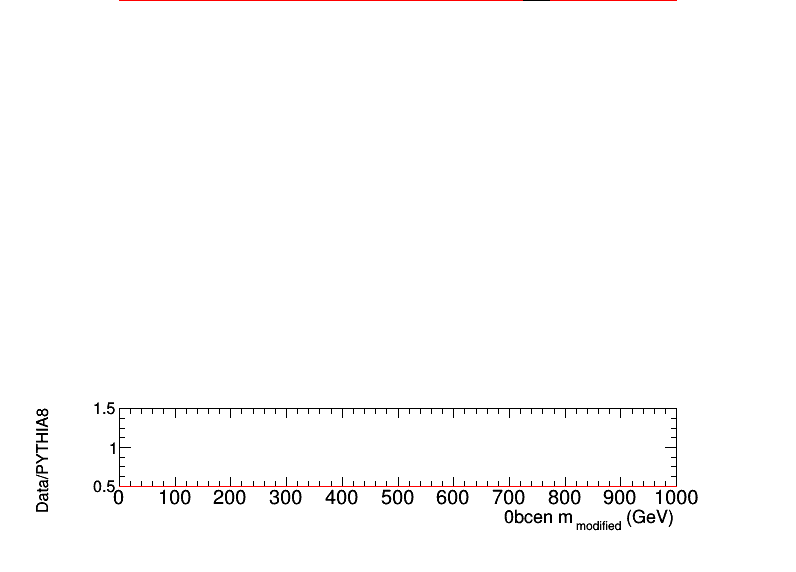

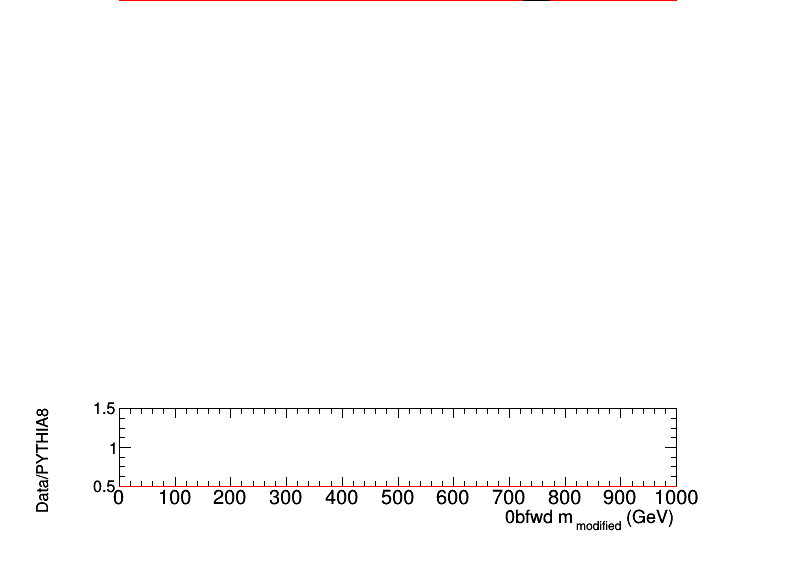

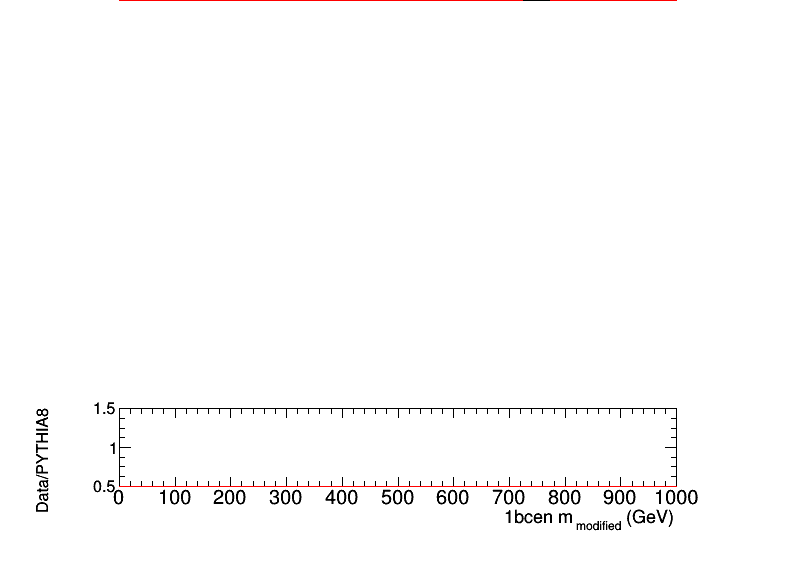

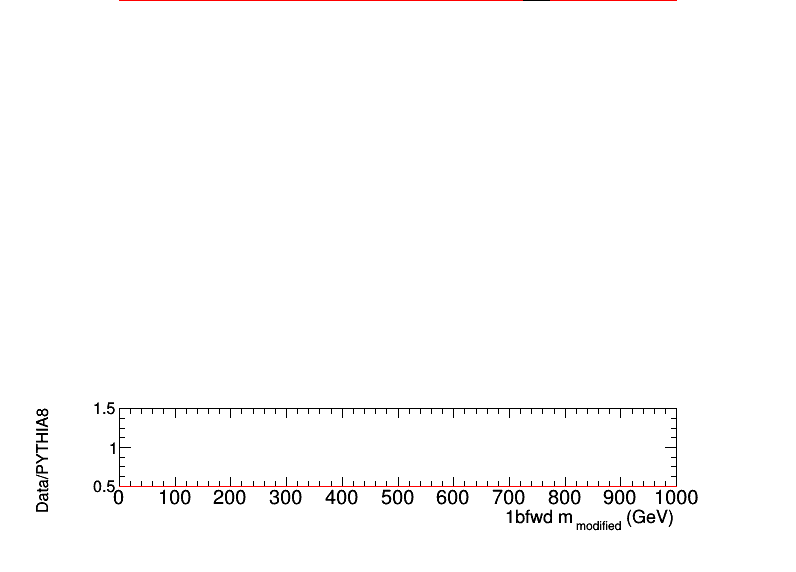

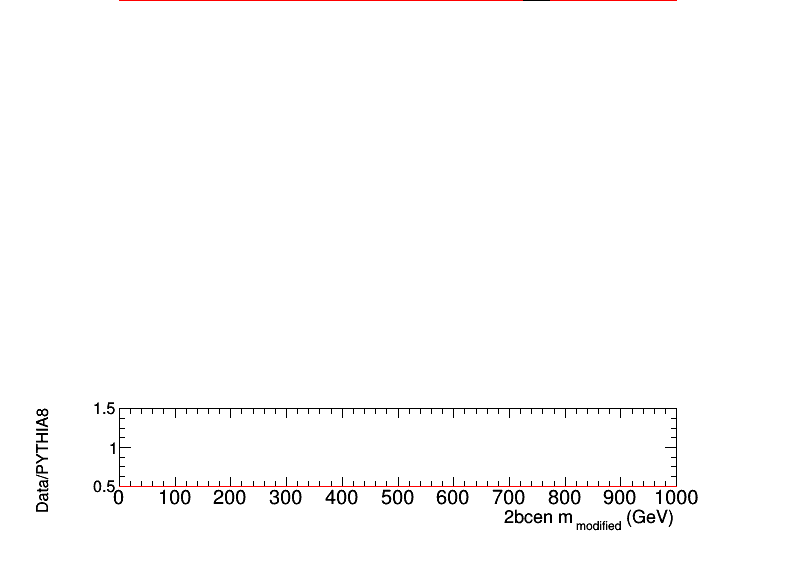

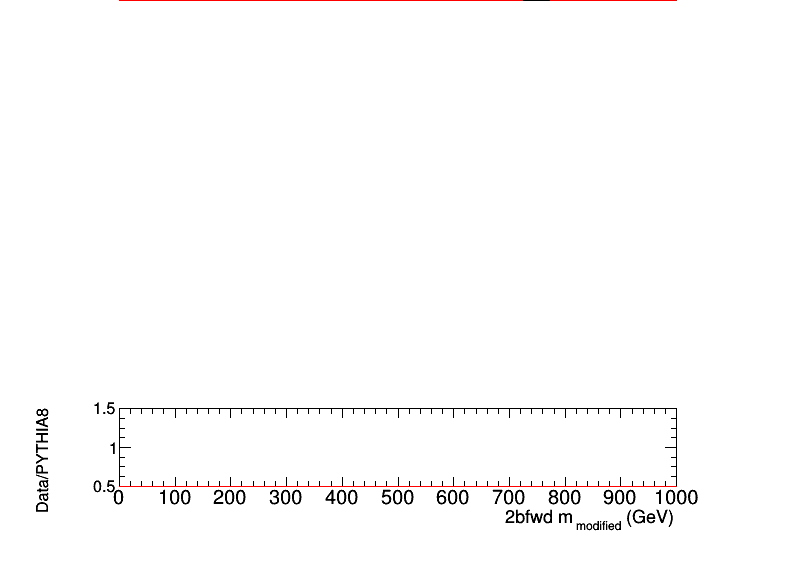

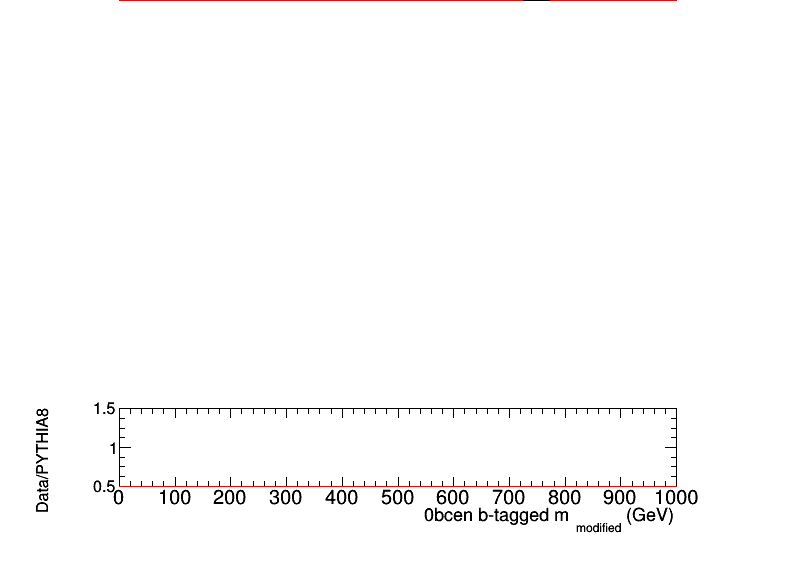

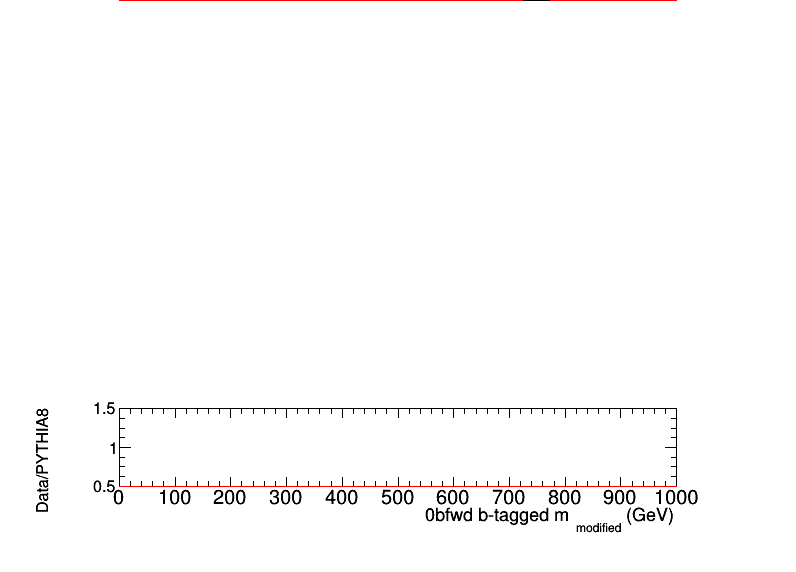

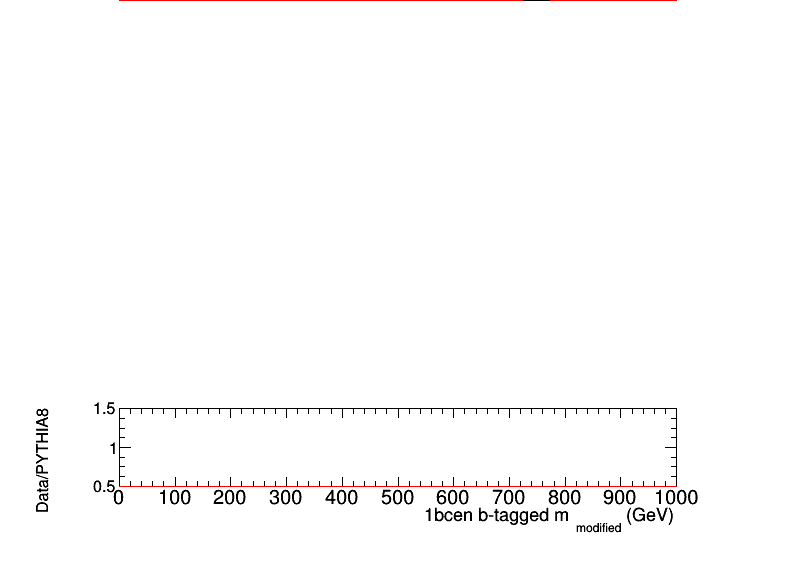

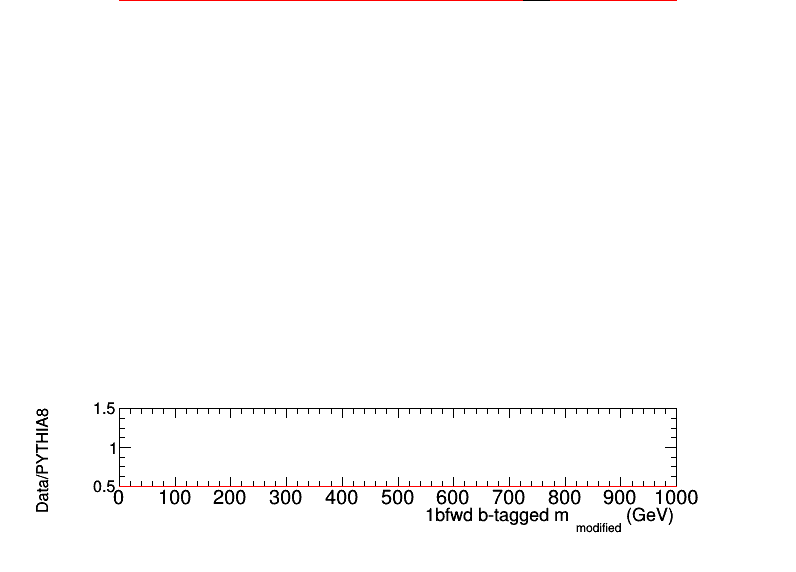

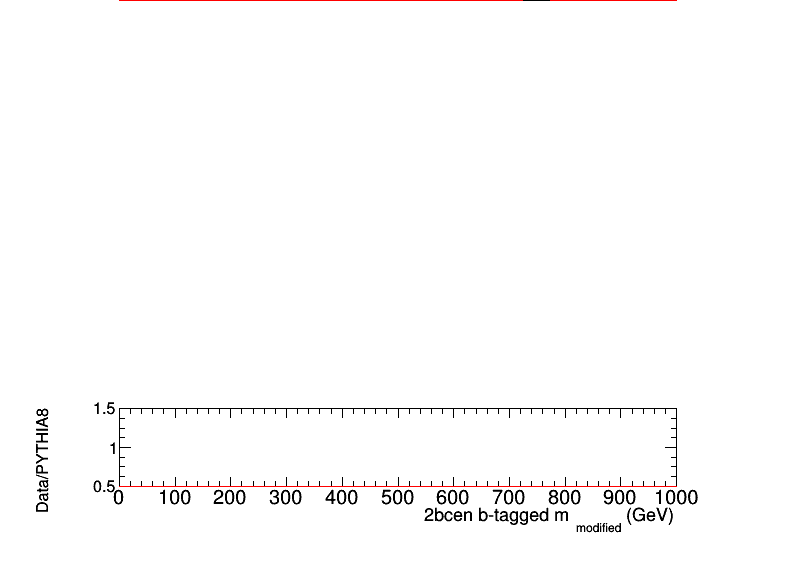

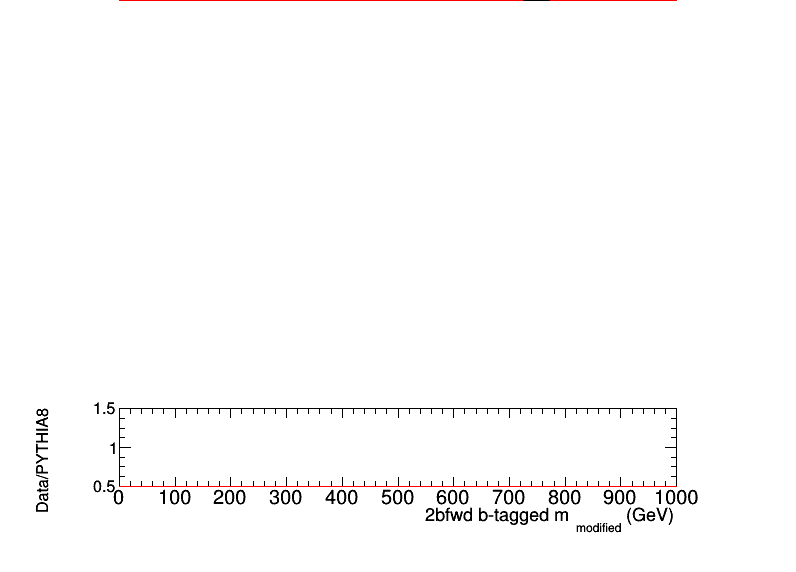

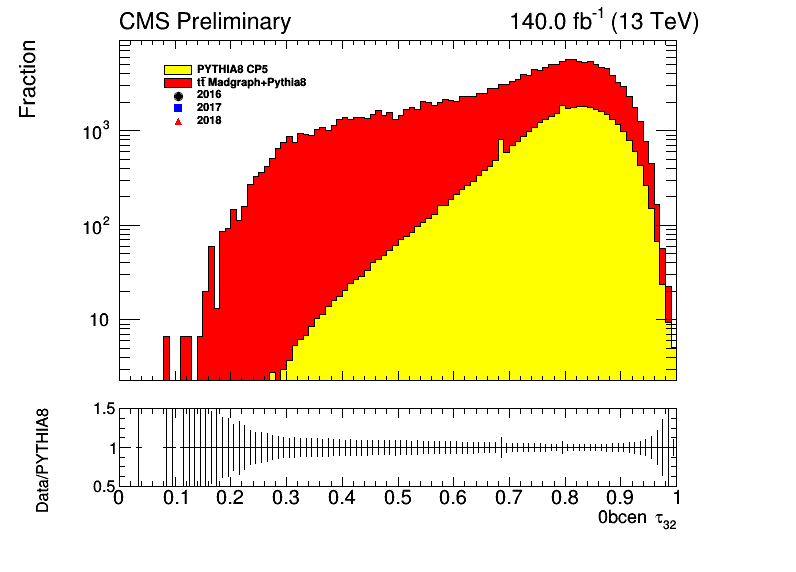

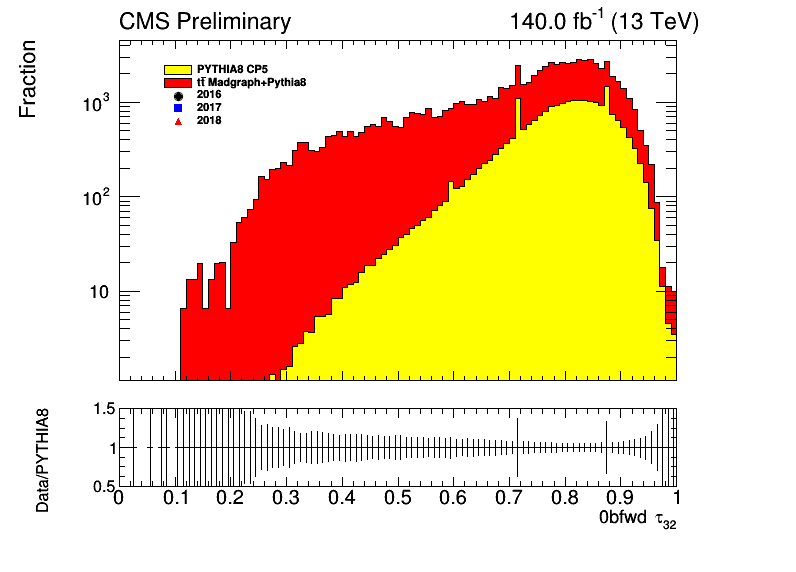

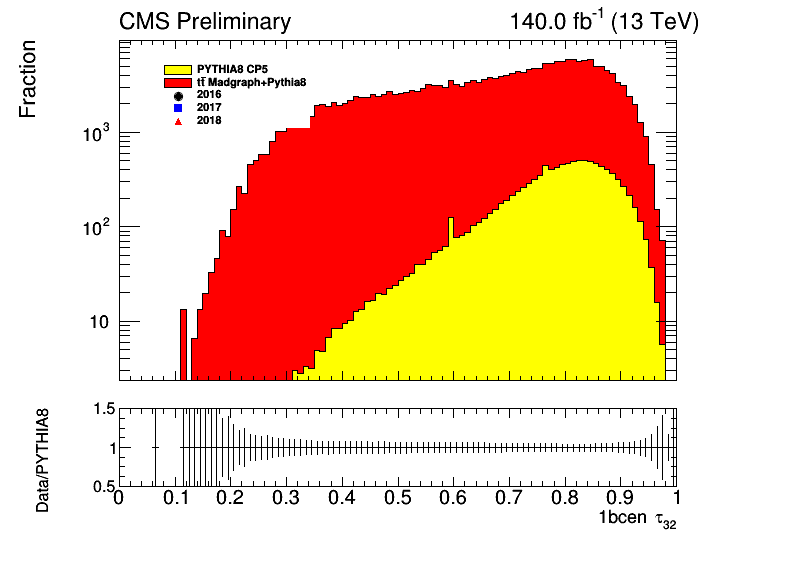

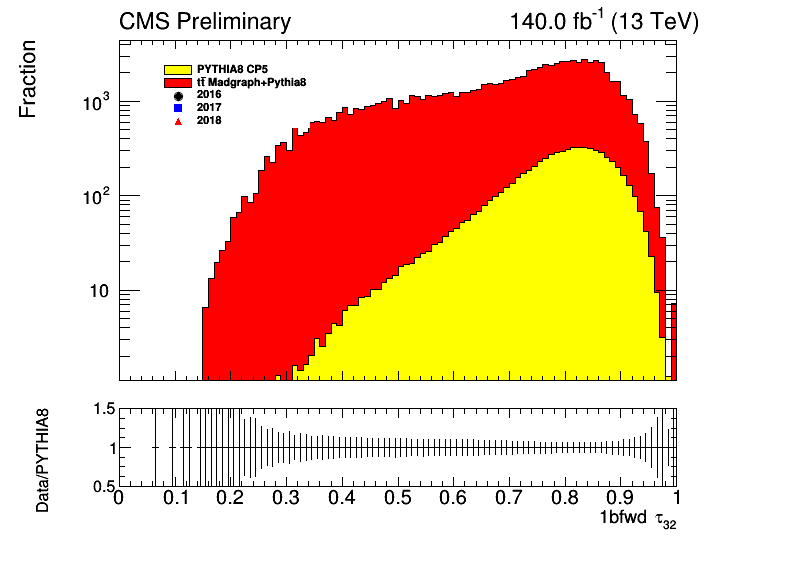

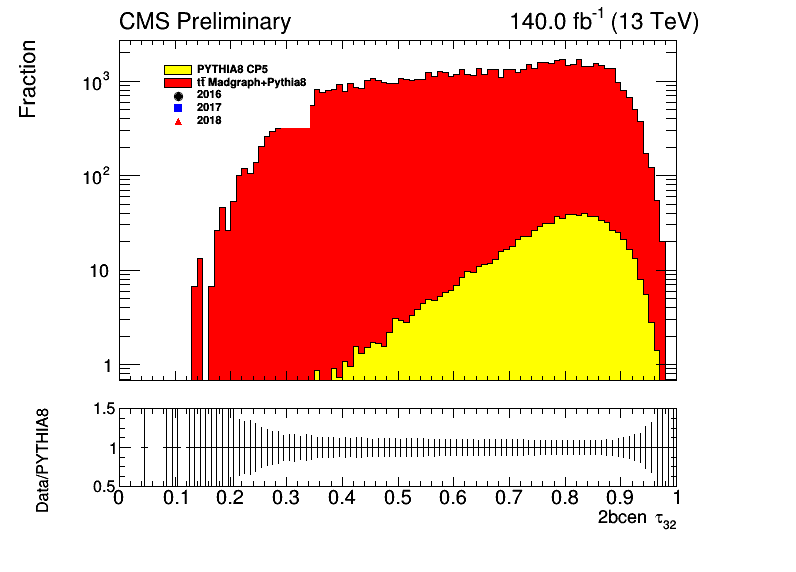

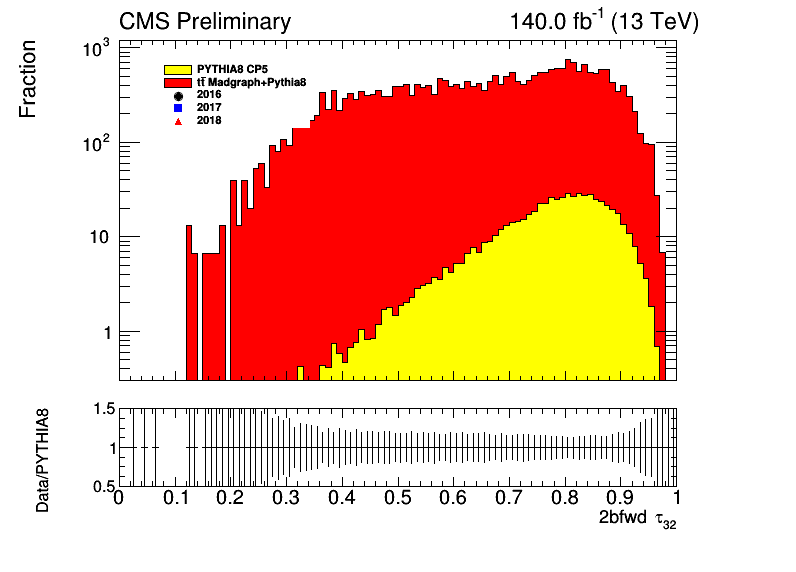

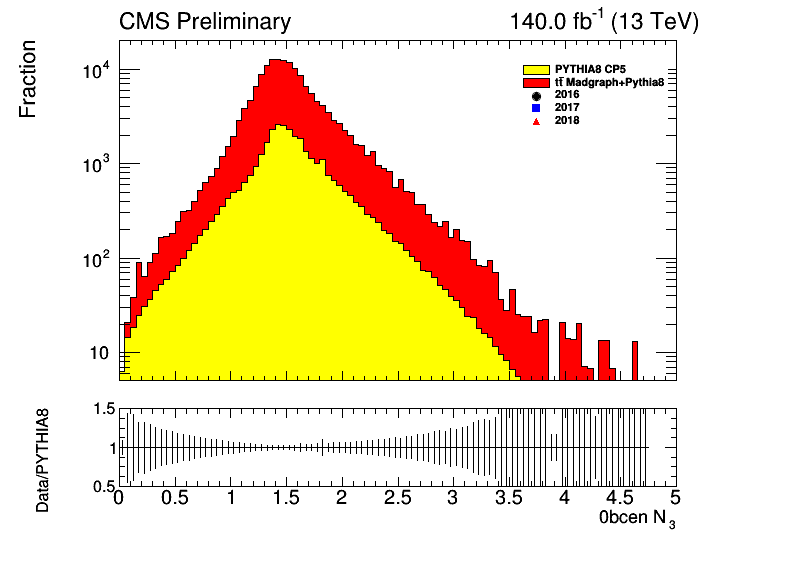

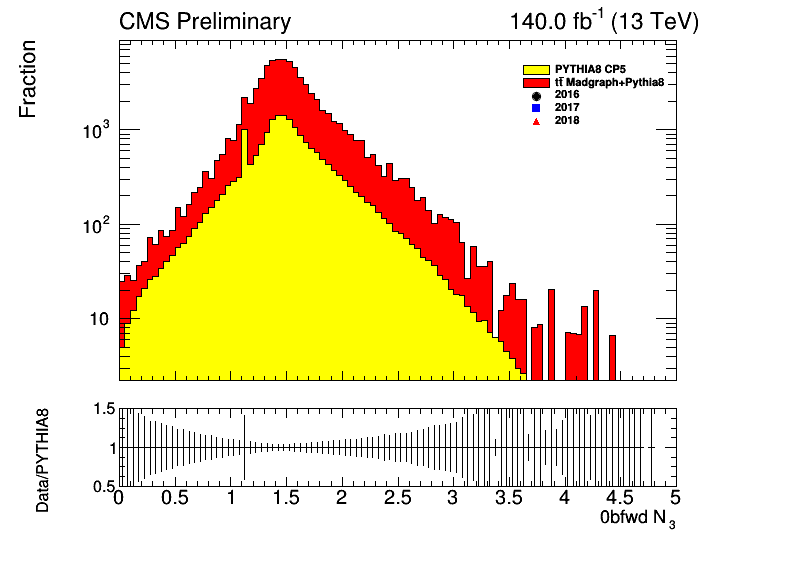

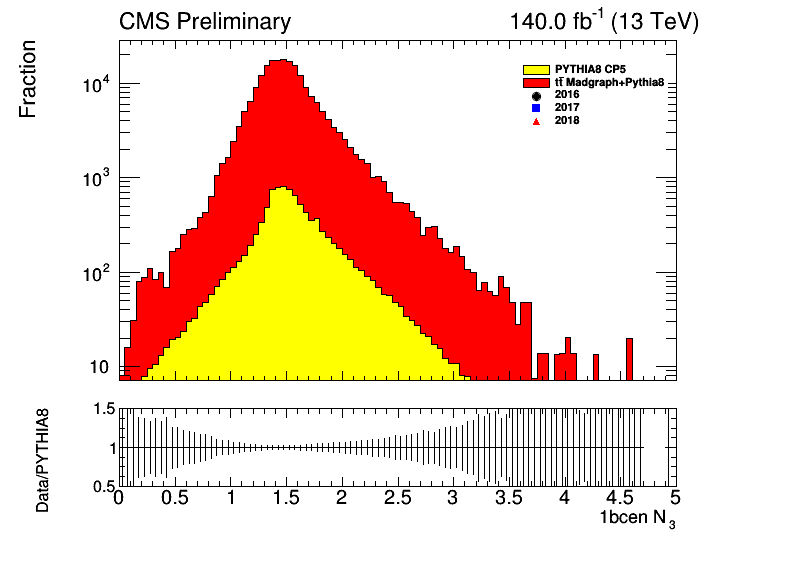

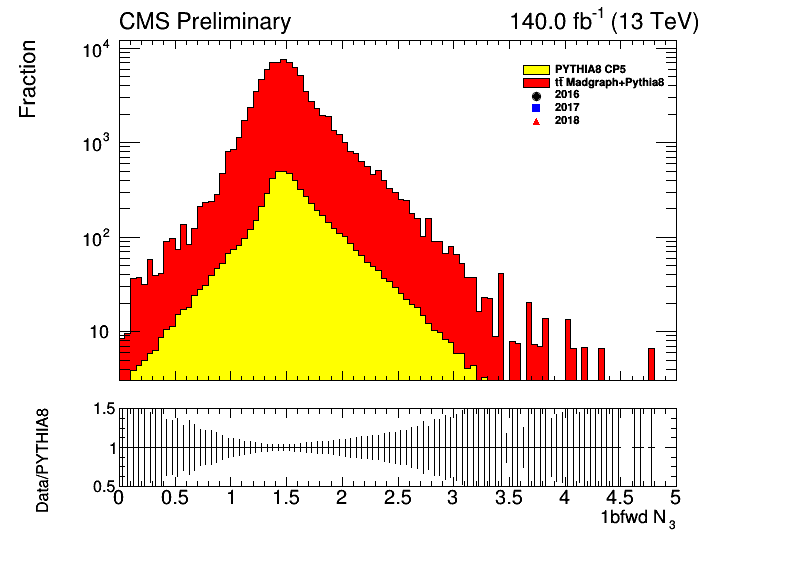

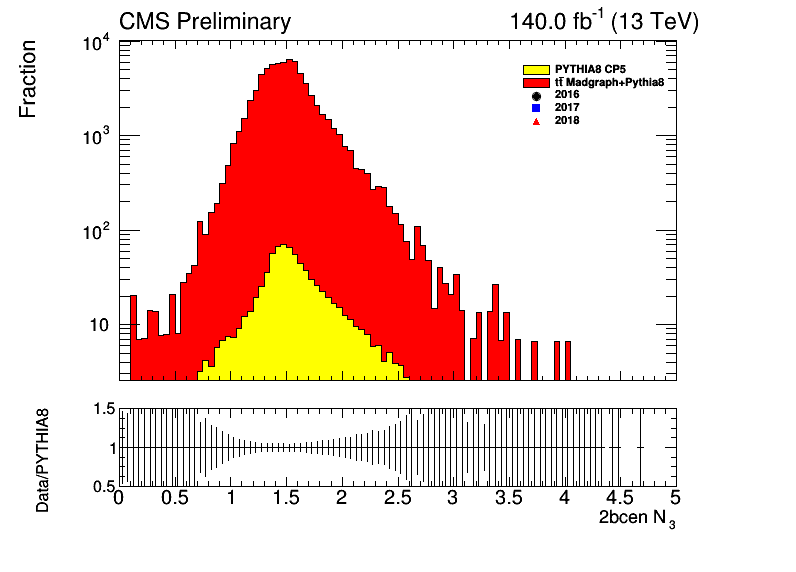

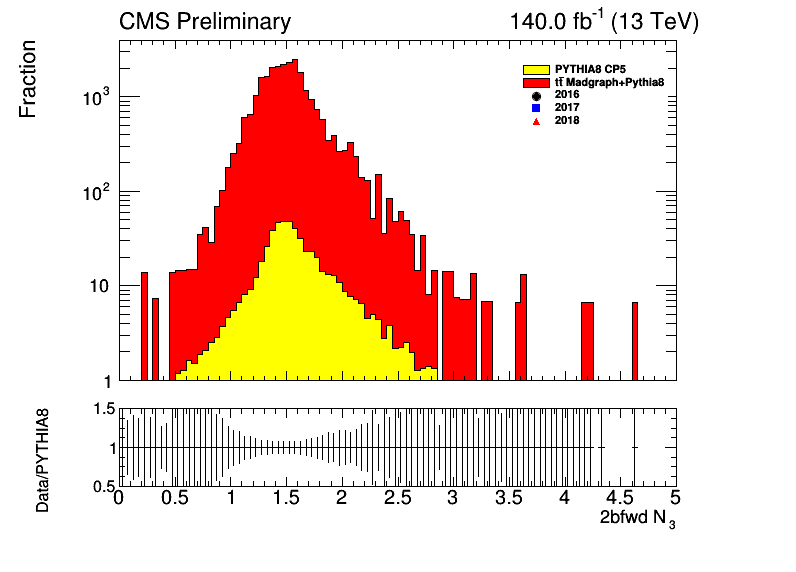

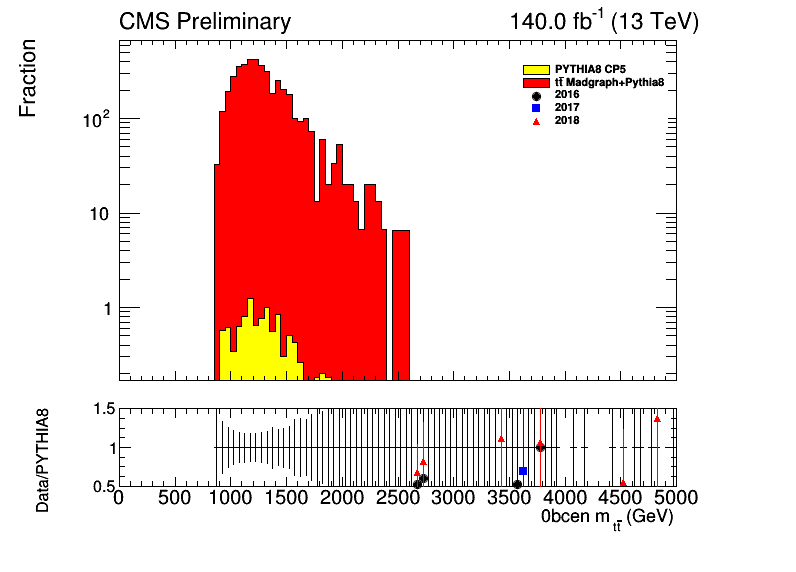

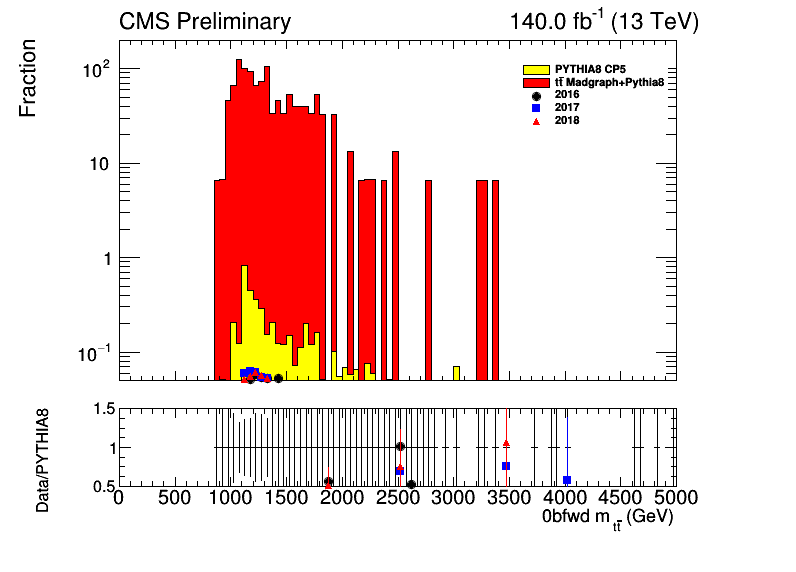

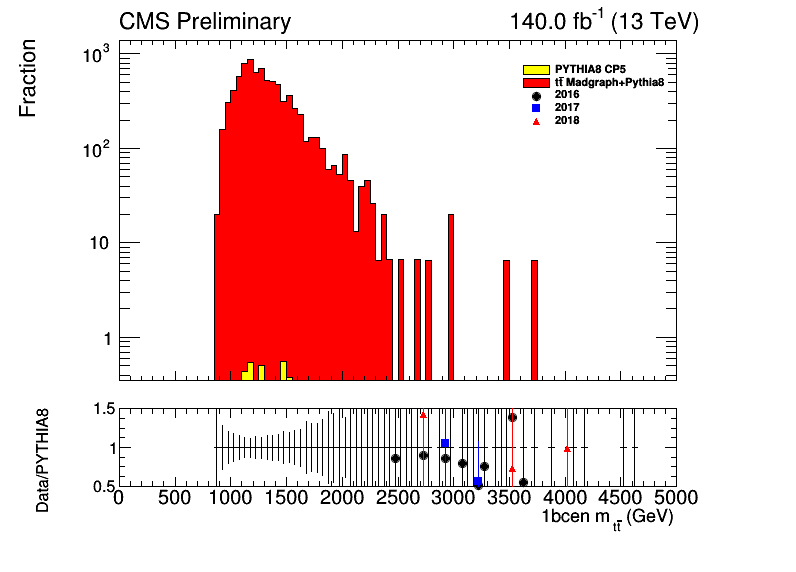

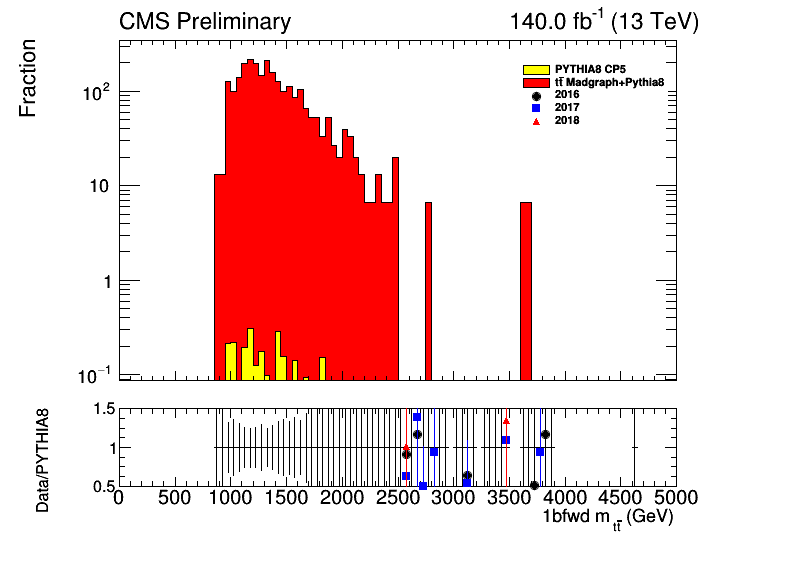

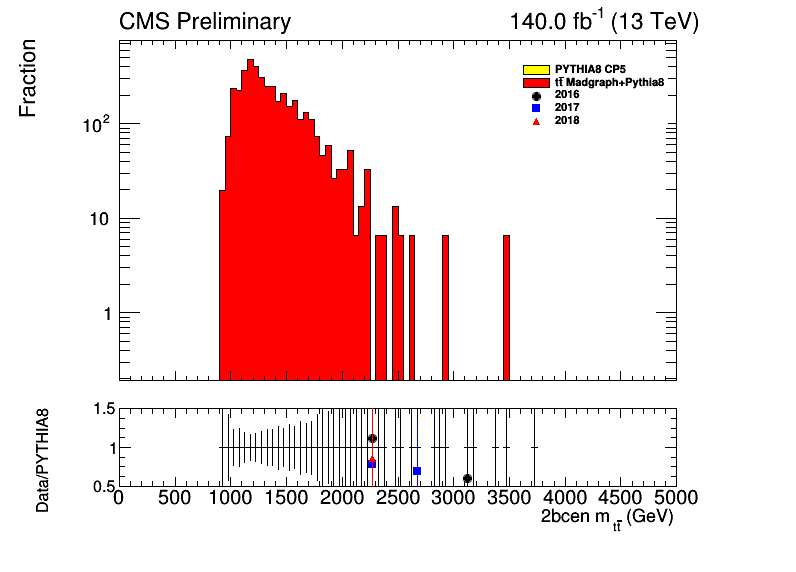

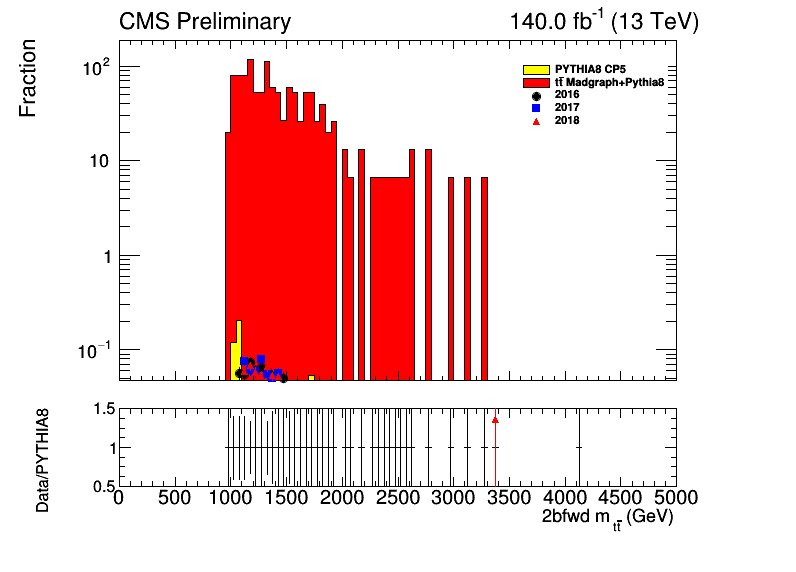

In [2]:
#!/usr/bin/env python

import ROOT
import itertools

import sys
sys.path
sys.path.append('../../python')

from tdrstyle import setTDRStyle

from HistDriver import *

setTDRStyle()

years = ['2016', '2017', '2018']
fnames = [ '../hists/WriteMistags_crab__JetHT_Run%s-Nano14Dec2018-v1.root' % (s) for s in years]
files = [ ROOT.TFile(s) for s in fnames ]
f_qcd = ROOT.TFile( '../hists/WriteMistags_crab__QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8_RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X.root' )
f_ttbar = ROOT.TFile('../hists/WriteMistags_crab__TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_m.root')

systs = [ 'nom' ]
btagcats = ["0b", "1b", "2b"]   # 0, 1, >=2 btags
ycats = ['cen', 'fwd']          # Central and forward
anacats = [ b+y for b,y in itertools.product( btagcats, ycats) ]


histnames = [
    ['ttbarres/h_ak8pt_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8msd_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8m_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8m_mod_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8m_modb_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8tau32_%s__nom' % s for s in anacats],
    ['ttbarres/h_ak8n3b1_%s__nom' % s for s in anacats],
    ['ttbarres/h_mttbar_%s__nom' % s for s in anacats],
]
histtitles = [
    [';%s p_{T} (GeV); Fraction' % s for s in anacats],
    [';%s m_{softdrop} (GeV); Fraction'% s for s in anacats],
    [';%s m (GeV); Fraction'% s for s in anacats],
    [';%s m_{modified} (GeV); Fraction'% s for s in anacats],
    [';%s b-tagged m_{modified} (GeV); Fraction'% s for s in anacats],
    [';%s #tau_{32}; Fraction'% s for s in anacats],
    [';%s N_{3}; Fraction'% s for s in anacats],
    [';%s m_{t#bar{t}} (GeV);Fraction'% s for s in anacats],
]
locs = [
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
    [0.20,0.68,0.39,0.84],
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
]
f_qcd.cd("ttbarres")
for f in files:
    f.cd("ttbarres")

canvs = []
legs = []

allhists = []

driver = HistDriver()

lumis = [36.26, 41.37, 61.6] # fb^-1
lumi = sum(lumis) * ( 1000. ) # pb-1 

ttbar_xs = 831.76 #  pb     BR for all-jets: 0.457  # from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/TtbarNNLO
ttbar_nevt = 8026103.   # from dasgoclient -query="summary dataset=/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/NANOAODSIM"

qcd_xs =  2022100000. # pb   from http://cms.cern.ch/iCMS/jsp/db_notes/noteInfo.jsp?cmsnoteid=CMS%20AN-2015/154 v3
qcd_sumw2 = 0.016839335 # sum of weights / number of events for one file to weight the xs
qcd_nevt = 18455107. / qcd_sumw2 # from dasgoclient -query="summary dataset=/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/NANOAODSIM"

for ihist,ihistnames in enumerate(histnames):
    for jhist, histname in enumerate(ihistnames):
    
        leg = ROOT.TLegend(locs[ihist][0],locs[ihist][1],locs[ihist][2],locs[ihist][3])
        leg.SetFillColor(0)
        leg.SetBorderSize(0)


        c = ROOT.TCanvas('c_' + histname, 'c_' + histname, 800,600)    
        p1,p2 = driver.setupPads(c)

        hqcd = f_qcd.Get(histname).Clone( histname +"_qcd" )
        hqcd.SetTitle(histtitles[ihist][jhist])
        httbar = f_ttbar.Get(histname).Clone(histname + "_ttbar")

        setStylesClass(hqcd, driver.styles['pythia8'])
        setStylesClass(httbar, driver.styles['ttbar'])

        
        hqcd.Scale( qcd_xs * lumi / qcd_nevt)
        httbar.Scale( ttbar_xs * lumi / ttbar_nevt )
        
        stack = ROOT.THStack('hs_' + histname, histtitles[ihist][jhist])
        stack.Add( hqcd, "hist" )
        stack.Add( httbar, "hist" )
        driver.plotHistAndRatio( p1,p2, stack, stack, option1="hist", ratiotitle='Data/PYTHIA8', logy=True, ratiorange=[0.5,1.5] )
        allhists.append([hqcd,httbar,stack])        
        leg.AddEntry(hqcd,  'PYTHIA8 CP5', 'f')
        leg.AddEntry(httbar,  't#bar{t} Madgraph+Pythia8', 'f')


        
        for iyear,year in enumerate(years):
            h = files[iyear].Get(histname).Clone( histname + '_' + year)
            if h.Integral() > 0:
                h.Scale(1.0/h.Integral())
            setStylesClass(h, driver.styles[year])
            allhists.append(h)
            leg.AddEntry(h, year, 'p')
            driver.plotHistAndRatio( p1,p2, h, stack, option1="same", option2="same", ratiotitle='Data/PYTHIA8', logy=True, ratiorange=[0.5,1.5] )
        #p1.cd()
        #stack.Draw("nostack")
        p1.cd()
        leg.Draw()
        driver.stampCMS( pad=p1, text="CMS Preliminary", lumi = 140e3 )

        c.Draw()
        c.Update()
        canvs.append(c)
        legs.append(leg)
        c.Print(histname.split('/')[1] + '.png', 'png')
        c.Print(histname.split('/')[1] + '.pdf', 'pdf')
    
    
        
        
        

